In [21]:
# enviornment imports
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.ticker import AutoMinorLocator
# local imports
import DataAndPlotting as my
# paths
path_fig  = 'C:\\Users\\polar\\OneDrive - The University of Kansas\\PHSX 616\\GitHub\PHSX616\\Lab3 - Torsional Oscillator\\Figures\\'
path_data = 'C:\\Users\\polar\\OneDrive - The University of Kansas\\PHSX 616\\GitHub\PHSX616\\Lab3 - Torsional Oscillator\\Data\\'

# Data

In [47]:
# store files names for all datasets
filenames: dict[str,str] = {
   'Resonance Vpp=5'    : path_data + 'ResonanceVpp5.csv', 
   'Resonance Vpp=0.25' : path_data + 'ResonanceVpp025.csv', 
   'V1 Ain-Aout'        : path_data + 'V1VarVpp.csv', 
   'V0 Ain-Aout t1'     : path_data + 'V0VarVpp_trial1.csv', 
   'V0 Ain-Aout t2'     : path_data + 'V0VarVpp_trial2.csv', 
} # t==trial

tables: dict[str, dict[str, np.array]] = my.UnpackAllTables(filenames)

Resonance Vpp=5 columns:	 ['Freqency [mHz]', 'Max pk-pk [V]', 'Max Amplitude [V]']
Resonance Vpp=0.25 columns:	 ['Freqency [mHz]', 'Max pk-pk [V]', 'Max Amplitude [V]']
V1 Ain-Aout columns:	 ['input Amp. [V]', 'Output Amp. [V]']
V0 Ain-Aout t1 columns:	 ['input Amp. [V]', 'Output Amp. [V]']
V0 Ain-Aout t2 columns:	 ['input Amp. [V]', 'Output Amp. [V]']


# Plots

In [23]:
# https://coolors.co/f75c03-d90368-820263-3c6e71-04a777
# colors = ['#F75C03','#D90368','#820263','#3C6E71','#04A777']

# https://coolors.co/122354-317787-ad9c0b-b85300-782b38
colors = ['#122354','#317787','#AD9C0B','#B85300','#782B38']
colors_dark = [my.darken_color(c, 1.2) for c in colors]


In [49]:
def PlotXmanyY(
    x: list[np.array], # x axis data points
    y: list[np.array], # y axis data points
    yleg : list[str], # legend lables 
    c : list, # colors
    xerr: float = 0,    # error on x axis
    yerr: float = 0,    # error on y axis
    xlab: str = '', # label on x axis 
    ylab: str = '', # label on y axis
    linestyle = '-',   # style of xy curve line
    xlim: list = None,  # x axis range 
    ylim: list = None,  # y axis range 
    logScale: bool = False,
    fileName: str = ''  # filename to save the figure as
) : 
    """Plotting function for x and y data arrays."""
    # formatting 
    my.SetStyle()
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    if(xlim != None) : plt.xlim(xlim)
    if(ylim != None) : plt.ylim(ylim)
    ax = plt.gca()
    ax.xaxis.set_minor_locator(AutoMinorLocator(4))
    ax.yaxis.set_minor_locator(AutoMinorLocator(4))
    ax.grid()
    if(logScale) : ax.set_yscale('log')
    # data
    for xi,yi,yl,ci in zip(x,y,yleg,c) : 
        plt.errorbar(xi, yi, yerr=yerr, xerr=xerr, elinewidth=0.8, c=ci, linestyle=linestyle, linewidth=0.5, label=yl)
    if( yleg[0] != None) : plt.legend()
    # finish 
    if(fileName != '') : my.Save(fileName)
    plt.show()

## Resonance

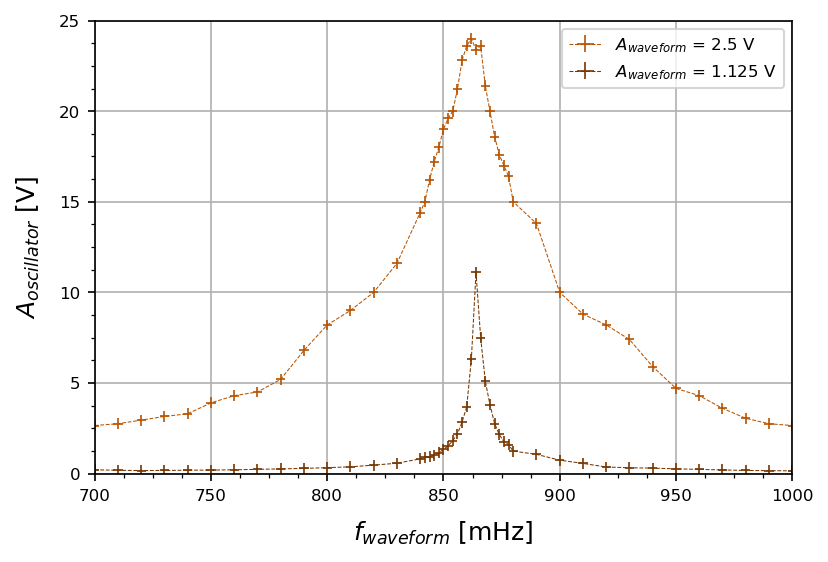

In [50]:
PlotXmanyY(
    x = [tables['Resonance Vpp=5']['Freqency [mHz]'],
         tables['Resonance Vpp=0.25']['Freqency [mHz]']],
    y  = [tables['Resonance Vpp=5']['Max Amplitude [V]'],
          tables['Resonance Vpp=0.25']['Max Amplitude [V]']],
    yleg = ['$A_{waveform}$ = 2.5 V', '$A_{waveform}$ = 1.125 V'],  
    c =[colors[3],colors_dark[3]],
    xerr = 2,    # error on x axis
    yerr = 0.3,    # error on y axis
    xlim = (700,1000),
    ylim = (0,25),
    xlab = '$f_{waveform}$ [mHz]', # label on x axis 
    ylab = '$A_{oscillator}$ [V]', # label on y axis
    linestyle = '--',   # style of xy curve line
    fileName = path_fig+'resonance_VvsF.png'  # filename to save the figure as
) 

## $v^1$ Magnetic Damping

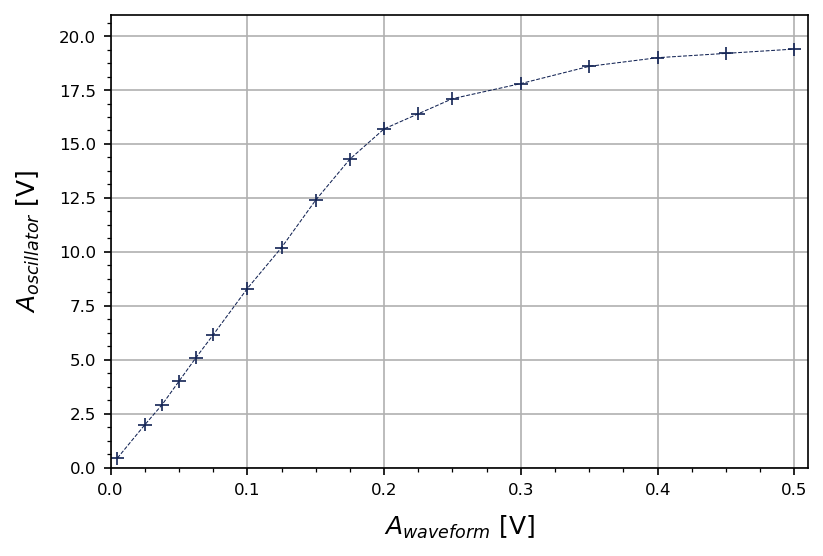

In [51]:
PlotXmanyY(
    x = [tables['V1 Ain-Aout']['input Amp. [V]']],
    y  = [tables['V1 Ain-Aout']['Output Amp. [V]']],
    yleg = [None],  
    c =[colors[0]],
    xerr = 0.005,    # error on x axis
    yerr = 0.3,    # error on y axis
    xlim = (0,.51),
    ylim=(0,21),
    xlab = '$A_{waveform}$ [V]', # label on x axis 
    ylab = '$A_{oscillator}$ [V]', # label on y axis
    linestyle = '--',   # style of xy curve line
    fileName = path_fig+'v1_AinAout.png'  # filename to save the figure as
) 

## $v^0$ Sliding damping

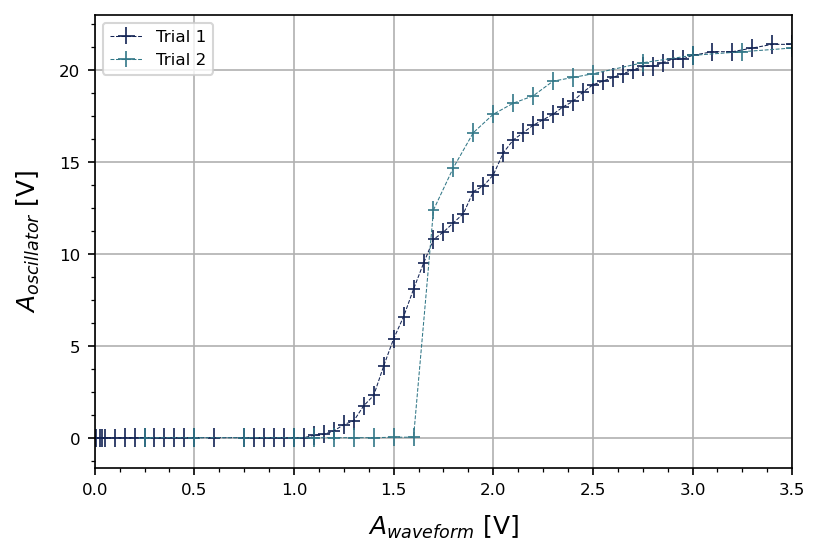

In [54]:
PlotXmanyY(
    x = [tables['V0 Ain-Aout t1']['input Amp. [V]'],
         tables['V0 Ain-Aout t2']['input Amp. [V]']],
    y  = [tables['V0 Ain-Aout t1']['Output Amp. [V]'],
          tables['V0 Ain-Aout t2']['Output Amp. [V]']],
    yleg = ['Trial 1', 'Trial 2'],  
    c =[colors[0],colors[1]],
    xerr = 0.03,    # error on x axis
    yerr = 0.5,    # error on y axis
    xlim = (0,3.5),
    # ylim=(0,21),
    xlab = '$A_{waveform}$ [V]', # label on x axis 
    ylab = '$A_{oscillator}$ [V]', # label on y axis
    linestyle = '--',   # style of xy curve line
    fileName = path_fig+'v1_AinAout.png'  # filename to save the figure as
) 